## Project Overview

This project mainly focus on finding the performance of Indonesia's tax regulation performance over 10 years from 2011 to 2020 by comparing its actual performance to predicted performance. A country's tax performance is measured with "**% Tax Revenue per GDP**" in this case and several indicators is used to asses the number.

##### Project Title : **Analysis of Indonesia's Income, Profit, and Capital Gain Tax Policy Performance over 10 Years from 2011 to 2020**

##### Author : **Jevis Xandra**

## Import Libraries and Datas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

In [2]:
tax_revenue_df = pd.read_csv("D:\Latihan Coding\TETRIS CEO BATCH 3\CAPSTONE PROJECT\Data\Tax Revenue\Tax Revenue Data.csv") # dari OECD
cpi_df = pd.read_csv("D:\Latihan Coding\TETRIS CEO BATCH 3\CAPSTONE PROJECT\Data\CPI Data\CPI Data.csv") # dari transparency international 
population_df = pd.read_csv("D:\Latihan Coding\TETRIS CEO BATCH 3\CAPSTONE PROJECT\Data\Population Data\Population Data.csv") # dari world bank
gdp_per_capita_df = pd.read_csv("D:\Latihan Coding\TETRIS CEO BATCH 3\CAPSTONE PROJECT\Data\GDP per Capita\GDP per Capita.csv") # dari world bank
inflation_df = pd.read_csv("D:\Latihan Coding\TETRIS CEO BATCH 3\CAPSTONE PROJECT\Data\Inflation Rate\Inflation Rate.csv") # dari world bank
unemployment_df = pd.read_csv("D:/Latihan Coding/TETRIS CEO BATCH 3/CAPSTONE PROJECT/Data/Unemployment Rate/Unemployment Rate.csv") # dari world bank
populationgrowth_df = pd.read_csv("D:/Latihan Coding/TETRIS CEO BATCH 3/CAPSTONE PROJECT/Data/Population Growth/Population Growth.csv") # dari world bank
fdi_df = pd.read_csv("D:\Latihan Coding\TETRIS CEO BATCH 3\CAPSTONE PROJECT\Data\FDI Data\FDI Data.csv") # dari world bank
labour_df = pd.read_csv("D:\Latihan Coding\TETRIS CEO BATCH 3\CAPSTONE PROJECT\Data\Labour Force Data\Labour Force.csv") # dari world bank


#### Tax Revenue Data Overview

In [3]:
tax_revenue_df.head(5)

,COU,Country,GOV,Level of government,TAX,Tax revenue,VAR,Indicator,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,NES,Total,TOTALTAX,Total tax revenue,TAXGDP,Tax revenue as % of GDP,1990,1990,NaN,NaN,0,Units,NaN,NaN,28.071,NaN,NaN
1,AUS,Australia,NES,Total,TOTALTAX,Total tax revenue,TAXGDP,Tax revenue as % of GDP,1991,1991,NaN,NaN,0,Units,NaN,NaN,26.633,NaN,NaN
2,AUS,Australia,NES,Total,TOTALTAX,Total tax revenue,TAXGDP,Tax revenue as % of GDP,1992,1992,NaN,NaN,0,Units,NaN,NaN,26.099,NaN,NaN
3,AUS,Australia,NES,Total,TOTALTAX,Total tax revenue,TAXGDP,Tax revenue as % of GDP,1993,1993,NaN,NaN,0,Units,NaN,NaN,26.569,NaN,NaN
4,AUS,Australia,NES,Total,TOTALTAX,Total tax revenue,TAXGDP,Tax revenue as % of GDP,1994,1994,NaN,NaN,0,Units,NaN,NaN,27.455,NaN,NaN


In [4]:
tax_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300518 entries, 0 to 300517
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   COU                    300518 non-null  object 
 1   Country                300518 non-null  object 
 2   GOV                    300518 non-null  object 
 3   Level of government    300518 non-null  object 
 4   TAX                    300518 non-null  object 
 5   Tax revenue            300518 non-null  object 
 6   VAR                    300518 non-null  object 
 7   Indicator              300518 non-null  object 
 8   YEA                    300518 non-null  int64  
 9   Year                   300518 non-null  int64  
 10  Unit Code              0 non-null       float64
 11  Unit                   0 non-null       float64
 12  PowerCode Code         300518 non-null  int64  
 13  PowerCode              300518 non-null  object 
 14  Reference Period Code  0 non-null   

#### CPI Data Overview

In [5]:
cpi_df.head(5)

,Year,Country,CPI Score,Rank,Number of Sources,Minimum score,Maximum score,Standard Error,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),ISO3,Region
0,2010,Denmark,93.0,1,6,89.0,95.0,2.0,94.0,91.0,DNK,WE/EU
1,2010,New Zealand,93.0,1,6,89.0,95.0,2.0,95.0,92.0,NZL,AP
2,2010,Singapore,93.0,1,9,89.0,95.0,2.0,94.0,92.0,SGP,AP
3,2010,Finland,92.0,4,6,89.0,95.0,2.0,93.0,91.0,FIN,WE/EU
4,2010,Sweden,92.0,4,6,89.0,95.0,2.0,94.0,91.0,SWE,WE/EU


In [6]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    1952 non-null   int64  
 1   Country                                 1952 non-null   object 
 2   CPI Score                               1952 non-null   float64
 3   Rank                                    1952 non-null   int64  
 4   Number of Sources                       1952 non-null   int64  
 5   Minimum score                           1952 non-null   float64
 6   Maximum score                           1952 non-null   float64
 7   Standard Error                          1952 non-null   float64
 8   90% Confidence Interval (Higher bound)  1952 non-null   float64
 9   90% Confidence Interval (Lower bound)   1952 non-null   float64
 10  ISO3                                    1920 non-null   obje

#### Population Data Overview

In [7]:
population_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN


In [8]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

#### GDP per Capita Data Overview

In [9]:
gdp_per_capita_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN


In [10]:
gdp_per_capita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            134 non-null    float64
 5   1961            136 non-null    float64
 6   1962            138 non-null    float64
 7   1963            138 non-null    float64
 8   1964            138 non-null    float64
 9   1965            149 non-null    float64
 10  1966            152 non-null    float64
 11  1967            155 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            169 non-null    float64
 15  1971            172 non-null    float64
 16  1972            172 non-null    float64
 17  1973            172 non-null    flo

#### Inflation Rate Data Overview

In [11]:
inflation_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,6.362961,6.079328,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.768436,2.130268,1.487416,1.764635,1.784050,1.758565,2.437609,3.745700,9.393839
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN


In [12]:
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            70 non-null     float64
 5   1961            72 non-null     float64
 6   1962            74 non-null     float64
 7   1963            75 non-null     float64
 8   1964            79 non-null     float64
 9   1965            86 non-null     float64
 10  1966            93 non-null     float64
 11  1967            100 non-null    float64
 12  1968            101 non-null    float64
 13  1969            102 non-null    float64
 14  1970            107 non-null    float64
 15  1971            111 non-null    float64
 16  1972            114 non-null    float64
 17  1973            117 non-null    flo

#### Unemployment Rate Data Overview

In [13]:
unemployment_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.512784,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219,7.916831
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.804447,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,4.742175
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,10.209000


In [14]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

#### Population Growth Data Overview

In [15]:
populationgrowth_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,NaN
1,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.660180,2.732633,2.753248,2.806915,2.840787,...,2.780157,2.774992,2.802587,2.728160,2.655673,2.688373,2.691136,2.678185,2.607473,NaN
2,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.925952,2.014879,2.078997,2.139651,2.216007,...,3.466788,3.657576,3.121341,2.581549,2.866492,2.885208,2.908529,3.134747,2.851358,NaN
3,Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,NaN,2.115789,2.145723,2.190827,2.211360,2.242567,...,2.761839,2.750731,2.723317,2.713059,2.706266,2.669239,2.633982,2.615646,2.573377,NaN
4,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.558355,1.460738,1.410425,1.301745,1.111041,...,3.735525,3.684429,3.617678,3.586211,3.550987,3.464457,3.395278,3.268348,3.166030,NaN


In [16]:
populationgrowth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

#### Foreign Direct Investment Data Overview

In [17]:
fdi_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.298275,8.979311,-0.971131,0.923362,5.254015,4.244573,-2.232924,6.171057,4.272050,NaN
1,Africa Eastern and Southern,AFE,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.191682,2.760111,3.118410,1.896000,0.990430,1.345067,1.502550,1.391215,4.968460,NaN
2,Afghanistan,AFG,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.234926,0.209119,0.845811,0.519387,0.272719,0.648440,0.123804,0.064389,0.139319,NaN
3,Africa Western and Central,AFW,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.301990,1.859727,2.039639,2.018266,2.583177,2.021615,1.566936,1.389678,2.432949,NaN
4,Angola,AGO,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.337281,2.664964,11.497702,-0.360184,-10.724951,-8.299051,-5.913333,-3.480978,-6.461186,NaN


In [18]:
fdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            141 non-null    float64
 15  1971            143 non-null    float64
 16  1972            151 non-null    float64
 17  1973            152 non-null    flo

#### Labour Force Data Overview

In [19]:
labour_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,227301880.0,233915961.0,241748050.0,249120842.0,256658813.0,263541096.0,271671732.0,276054782.0,286586189.0,297024063.0
2,Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,7881567.0,8285362.0,8630724.0,8913938.0,9254593.0,9613728.0,9991682.0,9105733.0,NaN,NaN
3,Africa Western and Central,AFW,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,131537915.0,135108966.0,139278883.0,144083199.0,148351940.0,153462322.0,158740921.0,161644121.0,167022127.0,173269006.0
4,Angola,AGO,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,10968484.0,11377486.0,11795033.0,12232879.0,12689061.0,13153405.0,13629799.0,13979133.0,14470377.0,15042938.0


In [20]:
labour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

## Data Cleaning and Exploration

#### Tax Revenue Data Cleaning

In [21]:
tax_revenue_df['Tax revenue'].unique()

array(['Total tax revenue',
       '1000 Taxes on income, profits and capital gains',
       '1100 Taxes on income, profits and capital gains of individuals',
       '1110 On income and profits of individuals',
       '1120 On capital gains of individuals',
       '1200 Taxes on income, profits and capital gains of corporates',
       '1210 On profits of corporates',
       '1220 On capital gains of corporates',
       '1300 Unallocable between 1100 and 1200',
       '2000 Social security contributions (SSC)', '2100 Employees SSC',
       '2200 Employers SSC', '2300 Self-employed or non-employed SSC',
       '2400 Unallocable between 2100, 2200 and 2300 SSC',
       '3000 Taxes on payroll and workforce', '4000 Taxes on property',
       '4100 Recurrent taxes on immovable property',
       '4200 Recurrent taxes on net wealth',
       '4300 Estate, inheritance and gift taxes',
       '4400 Taxes on financial and capital transactions',
       '4500 Non-recurrent taxes on property',
      

In [22]:
year_list = [x for x in range(2011,2021)]
str_year_list = [str(year) for year in range(2011, 2021)]

In [23]:
column_list = ['COU','Tax revenue','Year','Value']
clean_tax_revenue_df = tax_revenue_df[(tax_revenue_df['Indicator'] == "Tax revenue as % of GDP") & (tax_revenue_df['Tax revenue'] == '1000 Taxes on income, profits and capital gains') & (tax_revenue_df['Level of government'] == 'Total') & (tax_revenue_df['Year'].isin(year_list))][column_list]
clean_tax_revenue_df = clean_tax_revenue_df.rename(columns= {'COU':'Country Code'})
clean_tax_revenue_df

,Country Code,Tax revenue,Year,Value
83,AUS,"1000 Taxes on income, profits and capital gains",2011,15.193
84,AUS,"1000 Taxes on income, profits and capital gains",2012,15.544
85,AUS,"1000 Taxes on income, profits and capital gains",2013,15.394
86,AUS,"1000 Taxes on income, profits and capital gains",2014,15.708
87,AUS,"1000 Taxes on income, profits and capital gains",2015,15.765
...,...,...,...,...
299694,UKR,"1000 Taxes on income, profits and capital gains",2016,8.343
299695,UKR,"1000 Taxes on income, profits and capital gains",2017,8.686
299696,UKR,"1000 Taxes on income, profits and capital gains",2018,9.440
299697,UKR,"1000 Taxes on income, profits and capital gains",2019,9.876


#### CPI Data Cleaning

In [24]:
column_list = ['Year', 'Country', 'ISO3', 'CPI Score', 'Region']
clean_cpi_df = cpi_df[cpi_df.Year != 2010][column_list]
clean_cpi_df = clean_cpi_df.rename(columns = {'ISO3':'Country Code'})
clean_cpi_df

,Year,Country,Country Code,CPI Score,Region
178,2011,New Zealand,NZL,94.62681,AP
179,2011,Denmark,DNK,93.92080,WE/EU
180,2011,Finland,FIN,94.03927,WE/EU
181,2011,Sweden,SWE,92.98488,WE/EU
182,2011,Singapore,SGP,91.66839,AP
...,...,...,...,...,...
1947,2020,Venezuela,VEN,15.00000,AME
1948,2020,Yemen,YEM,15.00000,MENA
1949,2020,Syria,SYR,14.00000,MENA
1950,2020,Somalia,SOM,12.00000,SSA


#### Population Data Cleaning

In [25]:
clean_population_df = population_df[['Country Code'] + ['Country Name'] + str_year_list]
clean_population_df = pd.melt(clean_population_df, id_vars=['Country Name','Country Code'], value_vars=str_year_list).rename(columns = {'Country Name':'Country','variable':'Year', 'value':'Population'})
clean_population_df['Year'] = clean_population_df['Year'].astype(int)
clean_population_df

,Country,Country Code,Year,Population
0,Aruba,ABW,2011,101288.0
1,Africa Eastern and Southern,AFE,2011,537792950.0
2,Afghanistan,AFG,2011,29249157.0
3,Africa Western and Central,AFW,2011,366489204.0
4,Angola,AGO,2011,24259111.0
...,...,...,...,...
2655,Kosovo,XKX,2020,1790133.0
2656,"Yemen, Rep.",YEM,2020,32284046.0
2657,South Africa,ZAF,2020,58801927.0
2658,Zambia,ZMB,2020,18927715.0


#### GDP per Capita Data Cleaning

In [26]:
clean_gdp_per_capita_df = gdp_per_capita_df[['Country Code'] + ['Country Name'] + str_year_list]
clean_gdp_per_capita_df = pd.melt(clean_gdp_per_capita_df, id_vars=['Country Name','Country Code'], value_vars=str_year_list).rename(columns = {'Country Name':'Country','variable':'Year', 'value':'GDP per Capita'})
clean_gdp_per_capita_df['Year'] = clean_gdp_per_capita_df['Year'].astype(int)
clean_gdp_per_capita_df

,Country,Country Code,Year,GDP per Capita
0,Aruba,ABW,2011,26044.435930
1,Africa Eastern and Southern,AFE,2011,1792.907505
2,Afghanistan,AFG,2011,621.912311
3,Africa Western and Central,AFW,2011,1856.687669
4,Angola,AGO,2011,4511.153227
...,...,...,...,...
2655,Kosovo,XKX,2020,4310.811183
2656,"Yemen, Rep.",YEM,2020,NaN
2657,South Africa,ZAF,2020,5741.643129
2658,Zambia,ZMB,2020,956.831364


#### Inflation Rate Data Cleaning

In [27]:
clean_inflation_df = inflation_df[['Country Code'] + ['Country Name'] + str_year_list]
clean_inflation_df = pd.melt(clean_inflation_df, id_vars=['Country Name','Country Code'], value_vars=str_year_list).rename(columns = {'Country Name':'Country','variable':'Year', 'value':'Inflation Rate'})
clean_inflation_df['Year'] = clean_inflation_df['Year'].astype(int)
clean_inflation_df

,Country,Country Code,Year,Inflation Rate
0,Aruba,ABW,2011,4.316297
1,Africa Eastern and Southern,AFE,2011,8.971206
2,Afghanistan,AFG,2011,11.804186
3,Africa Western and Central,AFW,2011,4.018699
4,Angola,AGO,2011,13.482468
...,...,...,...,...
2655,Kosovo,XKX,2020,0.198228
2656,"Yemen, Rep.",YEM,2020,NaN
2657,South Africa,ZAF,2020,3.210036
2658,Zambia,ZMB,2020,15.733060


#### Unemployment Rate Data Cleaning

In [28]:
clean_unemployment_df = unemployment_df[['Country Code'] + ['Country Name'] + str_year_list]
clean_unemployment_df = pd.melt(clean_unemployment_df, id_vars=['Country Name','Country Code'], value_vars=str_year_list).rename(columns = {'Country Name':'Country','variable':'Year', 'value':'Unemployment Rate'})
clean_unemployment_df['Year'] = clean_unemployment_df['Year'].astype(int)
clean_unemployment_df

,Country,Country Code,Year,Unemployment Rate
0,Aruba,ABW,2011,NaN
1,Africa Eastern and Southern,AFE,2011,6.715358
2,Afghanistan,AFG,2011,7.947000
3,Africa Western and Central,AFW,2011,4.188828
4,Angola,AGO,2011,7.360000
...,...,...,...,...
2655,Kosovo,XKX,2020,NaN
2656,"Yemen, Rep.",YEM,2020,13.575000
2657,South Africa,ZAF,2020,24.340000
2658,Zambia,ZMB,2020,6.030000


#### Population Growth Data Cleaning

In [29]:
clean_populationgrowth_df = populationgrowth_df[['Country Code'] + ['Country Name'] + str_year_list]
clean_populationgrowth_df = pd.melt(clean_populationgrowth_df, id_vars=['Country Name','Country Code'], value_vars=str_year_list).rename(columns = {'Country Name':'Country','variable':'Year', 'value':'Population Growth'})
clean_populationgrowth_df['Year'] = clean_populationgrowth_df['Year'].astype(int)
clean_populationgrowth_df

,Country,Country Code,Year,Population Growth
0,Aruba,ABW,2011,0.939356
1,Africa Eastern and Southern,AFE,2011,2.738185
2,Afghanistan,AFG,2011,3.689508
3,Africa Western and Central,AFW,2011,2.848826
4,Angola,AGO,2011,3.758796
...,...,...,...,...
2655,Kosovo,XKX,2020,0.070131
2656,"Yemen, Rep.",YEM,2020,2.310447
2657,South Africa,ZAF,2020,1.223179
2658,Zambia,ZMB,2020,2.933818


#### Foreign Direct Investment Data Cleaning

In [30]:
clean_fdi_df = fdi_df[['Country Code'] + ['Country Name'] + str_year_list]
clean_fdi_df = pd.melt(clean_fdi_df, id_vars=['Country Name','Country Code'], value_vars=str_year_list).rename(columns = {'Country Name':'Country','variable':'Year', 'value':'Foreign Direct Investment'})
clean_fdi_df['Year'] = clean_fdi_df['Year'].astype(int)
clean_fdi_df

,Country,Country Code,Year,Foreign Direct Investment
0,Aruba,ABW,2011,18.504871
1,Africa Eastern and Southern,AFE,2011,1.845572
2,Afghanistan,AFG,2011,0.286818
3,Africa Western and Central,AFW,2011,3.600694
4,Angola,AGO,2011,-2.763035
...,...,...,...,...
2655,Kosovo,XKX,2020,5.113763
2656,"Yemen, Rep.",YEM,2020,NaN
2657,South Africa,ZAF,2020,0.934055
2658,Zambia,ZMB,2020,1.353931


#### Labour Force Data Cleaning

In [31]:
clean_labour_df = labour_df[['Country Code'] + ['Country Name'] + str_year_list]
clean_labour_df = pd.melt(clean_labour_df, id_vars=['Country Name','Country Code'], value_vars=str_year_list).rename(columns = {'Country Name':'Country','variable':'Year', 'value':'Labour Force'})
clean_labour_df['Year'] = clean_labour_df['Year'].astype(int)
clean_labour_df

,Country,Country Code,Year,Labour Force
0,Aruba,ABW,2011,NaN
1,Africa Eastern and Southern,AFE,2011,214767955.0
2,Afghanistan,AFG,2011,7098230.0
3,Africa Western and Central,AFW,2011,130610758.0
4,Angola,AGO,2011,10176620.0
...,...,...,...,...
2655,Kosovo,XKX,2020,NaN
2656,"Yemen, Rep.",YEM,2020,7295686.0
2657,South Africa,ZAF,2020,22920638.0
2658,Zambia,ZMB,2020,6488754.0


#### Final Data Merging

In [32]:
merge_df = pd.merge(clean_tax_revenue_df, clean_population_df, how='left', left_on=['Country Code','Year'], right_on = ['Country Code','Year'])
merge_df = pd.merge(merge_df, clean_cpi_df, how='left', left_on=['Country','Country Code','Year'], right_on = ['Country','Country Code','Year'])
merge_df = pd.merge(merge_df, clean_gdp_per_capita_df, how='left', left_on=['Country','Country Code','Year'], right_on = ['Country','Country Code','Year'])
merge_df = pd.merge(merge_df, clean_inflation_df, how='left', left_on=['Country','Country Code','Year'], right_on = ['Country','Country Code','Year'])
merge_df = pd.merge(merge_df, clean_populationgrowth_df, how='left', left_on=['Country','Country Code','Year'], right_on = ['Country','Country Code','Year'])
merge_df = pd.merge(merge_df, clean_fdi_df, how='left', left_on=['Country','Country Code','Year'], right_on = ['Country','Country Code','Year'])
merge_df = pd.merge(merge_df, clean_unemployment_df, how='left', left_on=['Country','Country Code','Year'], right_on = ['Country','Country Code','Year'])
merge_df = pd.merge(merge_df, clean_labour_df, how='left', left_on=['Country','Country Code','Year'], right_on = ['Country','Country Code','Year'])
merge_df['Labour Force Rate'] = merge_df['Labour Force']/merge_df['Population']
merge_df = merge_df.rename(columns={'Value':'% Tax Revenue per GDP'})
merge_df = merge_df[['Country Code','Country','Region','Year','Tax revenue','% Tax Revenue per GDP','CPI Score','GDP per Capita','Inflation Rate','Foreign Direct Investment','Population Growth','Unemployment Rate','Population','Labour Force Rate']]
merge_df = merge_df.dropna()
merge_df.head(10)

,Country Code,Country,Region,Year,Tax revenue,% Tax Revenue per GDP,CPI Score,GDP per Capita,Inflation Rate,Foreign Direct Investment,Population Growth,Unemployment Rate,Population,Labour Force Rate
0,AUS,Australia,AP,2011,"1000 Taxes on income, profits and capital gains",15.193,88.44156,62596.43217,3.303850,4.687830,1.389527,5.08,22340024.0,0.530091
1,AUS,Australia,AP,2012,"1000 Taxes on income, profits and capital gains",15.544,85.00000,68044.71482,1.762780,3.720390,1.745820,5.22,22733465.0,0.528133
2,AUS,Australia,AP,2013,"1000 Taxes on income, profits and capital gains",15.394,81.00000,68158.57974,2.449889,3.455097,1.721151,5.66,23128129.0,0.526497
3,AUS,Australia,AP,2014,"1000 Taxes on income, profits and capital gains",15.708,80.00000,62513.41122,2.487923,4.306697,1.491566,6.08,23475686.0,0.524643
4,AUS,Australia,AP,2015,"1000 Taxes on income, profits and capital gains",15.765,79.00000,56710.44572,1.508367,3.471958,1.439217,6.05,23815995.0,0.527146
5,AUS,Australia,AP,2016,"1000 Taxes on income, profits and capital gains",15.770,79.00000,49875.56514,1.276991,3.561397,1.561940,5.71,24190907.0,0.526165
6,AUS,Australia,AP,2017,"1000 Taxes on income, profits and capital gains",16.752,77.00000,53936.14025,1.948647,3.633473,1.653391,5.59,24594202.0,0.528851
7,AUS,Australia,AP,2018,"1000 Taxes on income, profits and capital gains",17.204,77.00000,57207.87151,1.911401,4.248855,1.502993,5.30,24966643.0,0.533046
8,AUS,Australia,AP,2019,"1000 Taxes on income, profits and capital gains",16.398,77.00000,54941.43418,1.610768,2.798356,1.485208,5.16,25340217.0,0.536316
9,AUS,Australia,AP,2020,"1000 Taxes on income, profits and capital gains",16.832,77.00000,51720.37076,0.846906,1.153618,1.235701,6.46,25655289.0,0.529723


In [33]:
merge_df.nunique()

Country Code                  97
Country                       97
Region                         6
Year                          10
Tax revenue                    1
% Tax Revenue per GDP        876
CPI Score                    168
GDP per Capita               926
Inflation Rate               926
Foreign Direct Investment    926
Population Growth            926
Unemployment Rate            746
Population                   926
Labour Force Rate            926
dtype: int64

In [34]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 1240
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country Code               926 non-null    object 
 1   Country                    926 non-null    object 
 2   Region                     926 non-null    object 
 3   Year                       926 non-null    int64  
 4   Tax revenue                926 non-null    object 
 5   % Tax Revenue per GDP      926 non-null    float64
 6   CPI Score                  926 non-null    float64
 7   GDP per Capita             926 non-null    float64
 8   Inflation Rate             926 non-null    float64
 9   Foreign Direct Investment  926 non-null    float64
 10  Population Growth          926 non-null    float64
 11  Unemployment Rate          926 non-null    float64
 12  Population                 926 non-null    float64
 13  Labour Force Rate          926 non-null    float6

#### Remove Rows with Value Zero

In [35]:
parameter_list = ['% Tax Revenue per GDP','CPI Score','GDP per Capita','Inflation Rate','Population Growth','Unemployment Rate','Labour Force Rate']
for i in parameter_list:
    merge_df = merge_df[merge_df[i] != 0]

#### Checking Correlation

In [36]:
print("% Tax Revenue per GDP's Correlation to : ")
print(merge_df.corr()['% Tax Revenue per GDP'][2:])

for i in year_list :
    print(" ")
    print("In year" + str(i) + "% Tax Revenue per GDP 's correlation to : ")
    print(merge_df[merge_df['Year'] == i].corr()['% Tax Revenue per GDP'][2:])

% Tax Revenue per GDP's Correlation to : 
CPI Score                    0.683094
GDP per Capita               0.680292
Inflation Rate              -0.222111
Foreign Direct Investment   -0.035307
Population Growth           -0.267982
Unemployment Rate            0.201222
Population                  -0.108056
Labour Force Rate            0.366118
Name: % Tax Revenue per GDP, dtype: float64
 
In year2011% Tax Revenue per GDP 's correlation to : 
CPI Score                    0.627620
GDP per Capita               0.643337
Inflation Rate              -0.352270
Foreign Direct Investment   -0.029993
Population Growth           -0.263101
Unemployment Rate            0.150621
Population                  -0.098540
Labour Force Rate            0.339727
Name: % Tax Revenue per GDP, dtype: float64
 
In year2012% Tax Revenue per GDP 's correlation to : 
CPI Score                    0.611729
GDP per Capita               0.664180
Inflation Rate              -0.261814
Foreign Direct Investment   -0.15636

#### Remove Parameter with Low Correlation to % Tax Revenue per GDP

In [37]:
merge_df = merge_df.drop(['Population','Foreign Direct Investment'], axis = 1)

## Data Visualization

#### Correlation

Year 2011


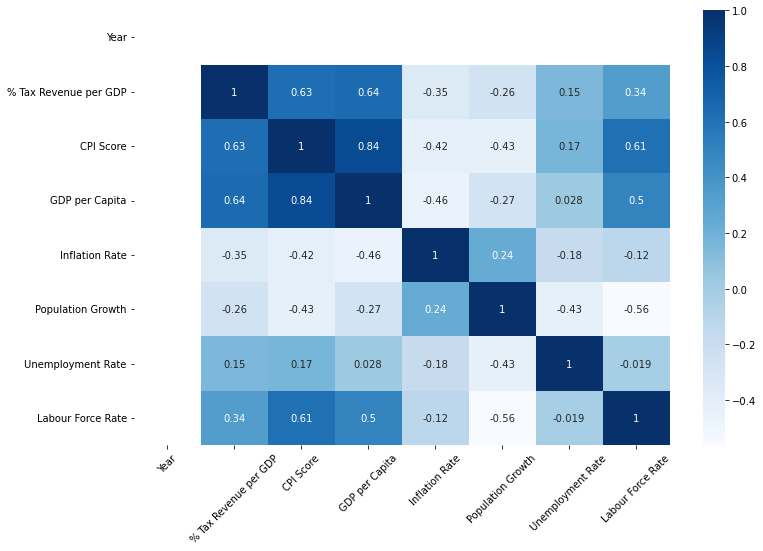

Year 2012


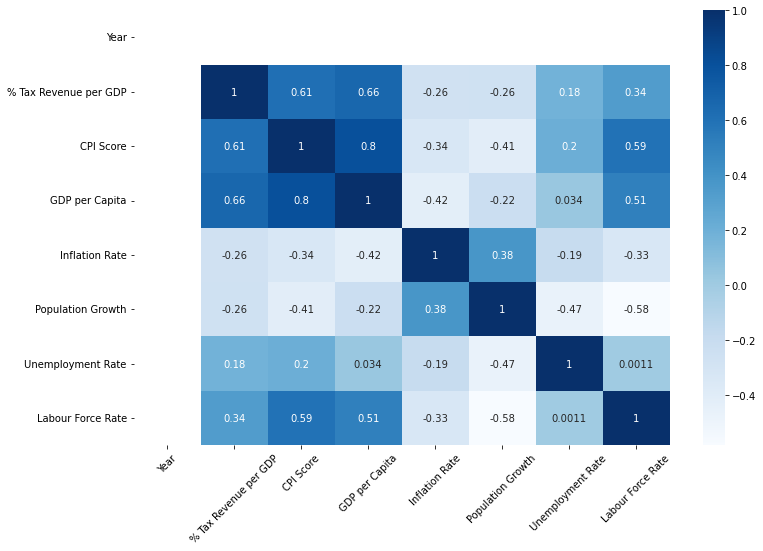

Year 2013


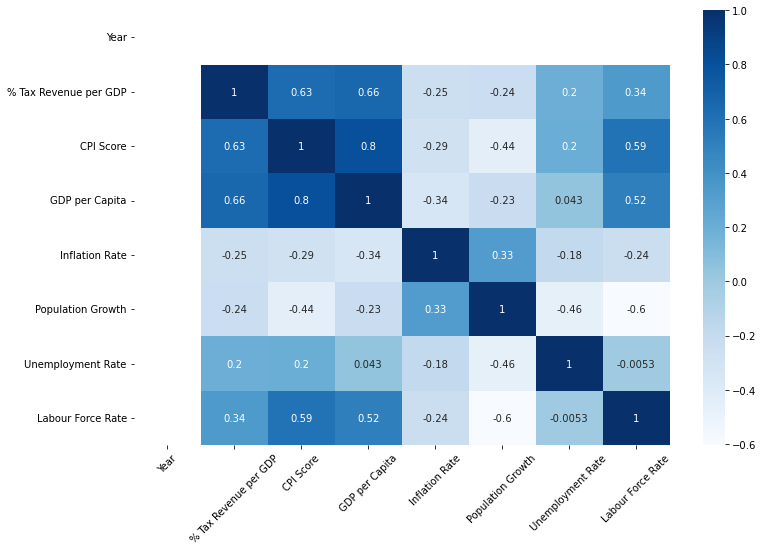

Year 2014


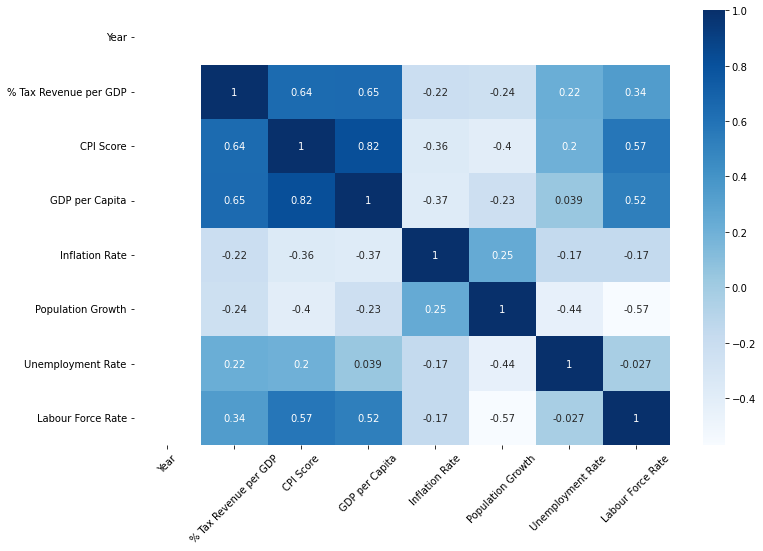

Year 2015


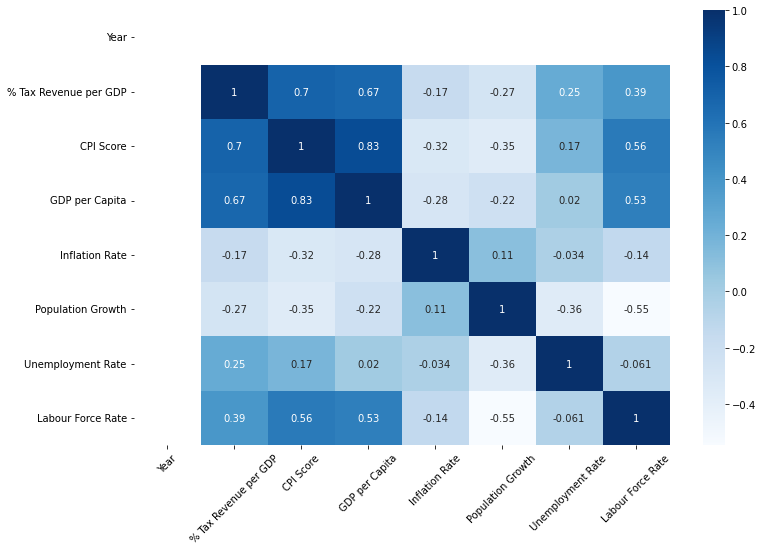

Year 2016


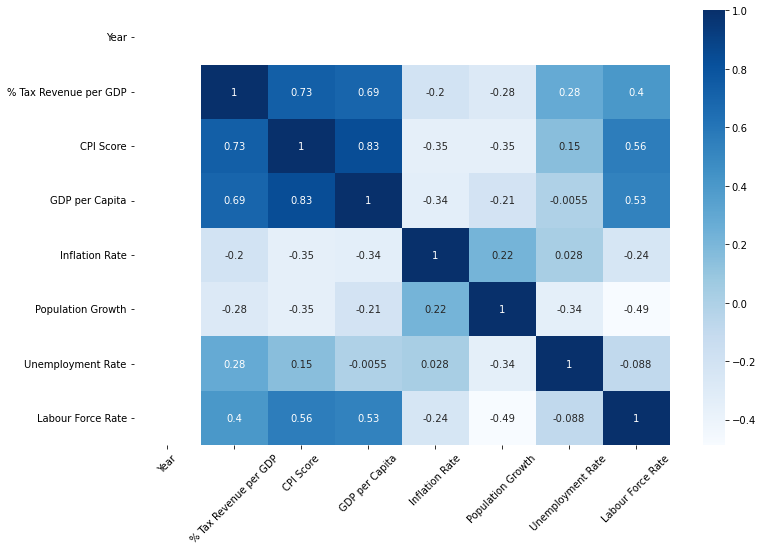

Year 2017


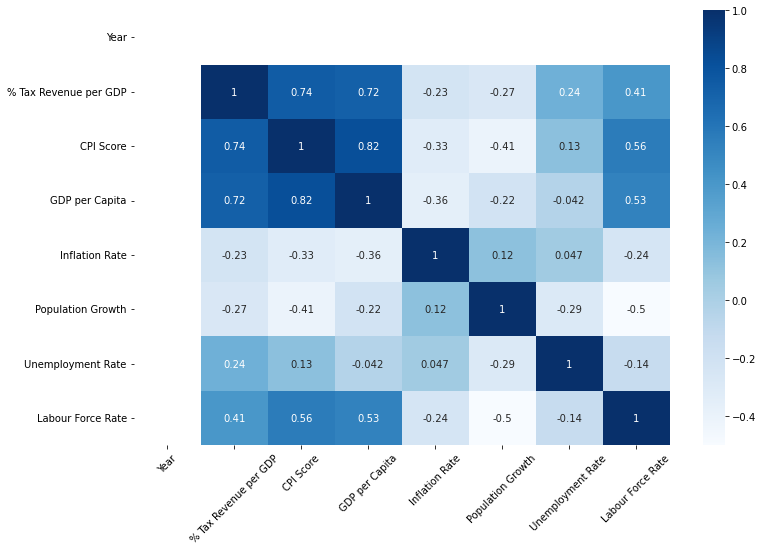

Year 2018


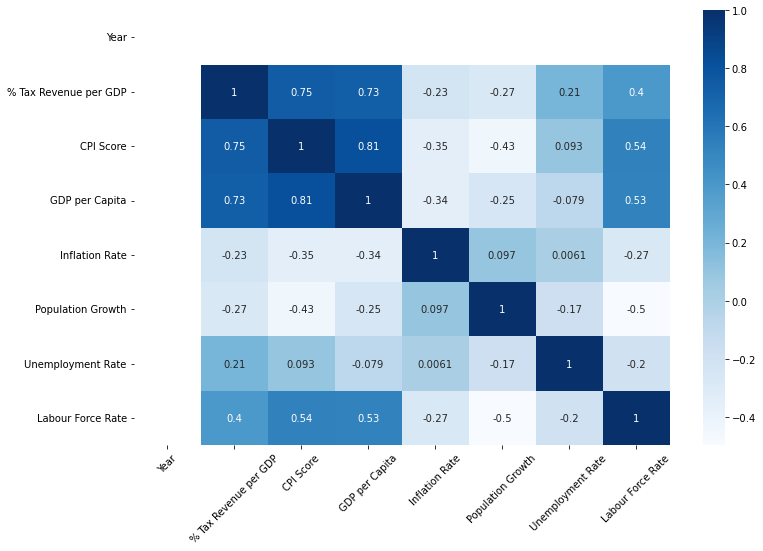

Year 2019


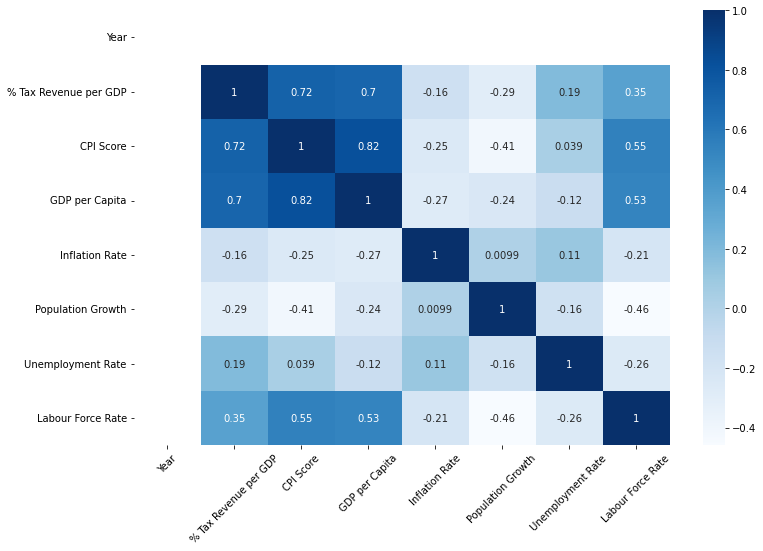

Year 2020


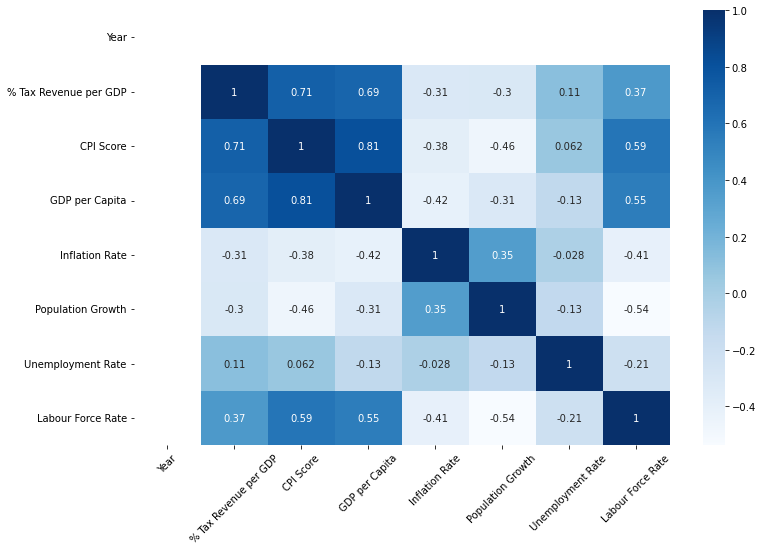

In [38]:
for i in year_list: 
    print("Year " + str(i))
    plt.figure(figsize=(12,8))
    sns.heatmap(merge_df[merge_df['Year'] == i].corr(), annot=True, cmap="Blues")
    plt.xticks(rotation=45)
    plt.show()

## Machine Learning and Model Training

#### Build Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

for i in year_list : 
    exec("X_" + str(i) + " = merge_df[merge_df['Year'] == " + str(i) + "].drop(merge_df.columns[0:6], axis=1)") # Indipendent variable
    exec("y_" + str(i) + " = merge_df[merge_df['Year'] == " + str(i) + "]['% Tax Revenue per GDP']")  # Dependent variable
    exec("X_train_" + str(i) + ", X_test_" + str(i) + ", y_train_" + str(i) + ", y_test_" + str(i) +
         " = train_test_split(X_" + str(i) + ", y_" + str(i) + ", test_size=0.2, random_state=42)")
    exec("model_" + str(i) + " = LinearRegression()")
    exec("model_" + str(i) + ".fit(X_train_" + str(i) + ", y_train_" + str(i) + ")")
    exec("y_pred_" + str(i) + " = model_" + str(i) + ".predict(X_test_" + str(i) + ")")

#### Evaluate Result

In [40]:
for i in year_list:
    exec("error_" + str(i) + " = np.mean(np.abs((y_test_" + str(i) + " - y_pred_" + str(i) + ") / y_test_" + str(i) + ")) * 100")
    exec("print(error_" + str(i) + ")")

42.289007548111115
34.096527695237185
31.624740472840358
33.225664380438744
33.75634902758635
22.336865353310774
26.46708993755955
24.88014268260963
29.339019525905385
30.647268191200304


#### Final Model and Analysis

In [41]:
for i in year_list : 
    exec("X_" + str(i) + " = merge_df[merge_df['Year'] == " + str(i) + "].drop(merge_df.columns[0:6], axis=1)") # Indipendent variable
    exec("y_" + str(i) + " = merge_df[merge_df['Year'] == " + str(i) + "]['% Tax Revenue per GDP']")  # Dependent variable
    exec("X_train_" + str(i) + ", X_test_" + str(i) + ", y_train_" + str(i) + ", y_test_" + str(i) +
         " = train_test_split(X_" + str(i) + ", y_" + str(i) + ", test_size=0.2, random_state=42)")
    exec("model_" + str(i) + " = LinearRegression()")
    exec("model_" + str(i) + ".fit(X_train_" + str(i) + ", y_train_" + str(i) + ")")
    exec("y_pred_" + str(i) + " = model_" + str(i) + ".predict(X_test_" + str(i) + ")")

In [42]:
for i in year_list : 
    exec("X_" + str(i) + " = merge_df[(merge_df['Year'] == " + str(i) + ") & (merge_df['Country'] != 'Indonesia')].drop(merge_df.columns[0:6], axis=1)") # Indipendent variable
    exec("y_" + str(i) + " = merge_df[(merge_df['Year'] == " + str(i) + ") & (merge_df['Country'] != 'Indonesia')]['% Tax Revenue per GDP']")  # Dependent variable
    exec("model_" + str(i) + " = LinearRegression()")
    exec("model_" + str(i) + ".fit(X_" + str(i) + ", y_" + str(i) + ")")
    exec("indo_" + str(i) + " = model_" + str(i) + ".predict(merge_df[(merge_df['Year'] == " + str(i) + ") & (merge_df['Country'] == 'Indonesia')].drop(merge_df.columns[0:6], axis=1))")

In [43]:
indo_pred = []
for i in year_list:
    exec("indo_pred.append(indo_" + str(i) + "[0])")
indo_act = list(merge_df[merge_df['Country'] == 'Indonesia']['% Tax Revenue per GDP'])

Text(0, 0.5, 'Predicted % Tax Revenue per GDP')

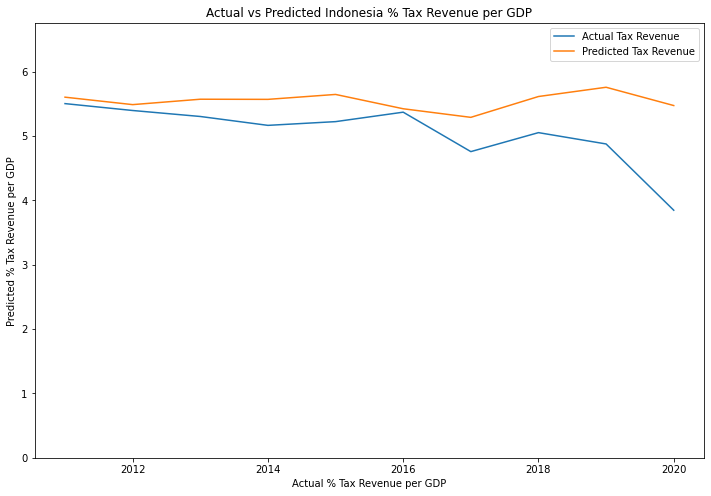

In [44]:
plt.figure(figsize=(12,8))
sns.lineplot(x=year_list, y=indo_act, label='Actual Tax Revenue')
sns.lineplot(x=year_list, y=indo_pred, label='Predicted Tax Revenue')
plt.ylim(0, max(indo_act + indo_pred) + 1)
plt.title("Actual vs Predicted Indonesia % Tax Revenue per GDP")
plt.xlabel("Actual % Tax Revenue per GDP")
plt.ylabel("Predicted % Tax Revenue per GDP")

Text(0, 0.5, 'Predicted % Tax Revenue per GDP')

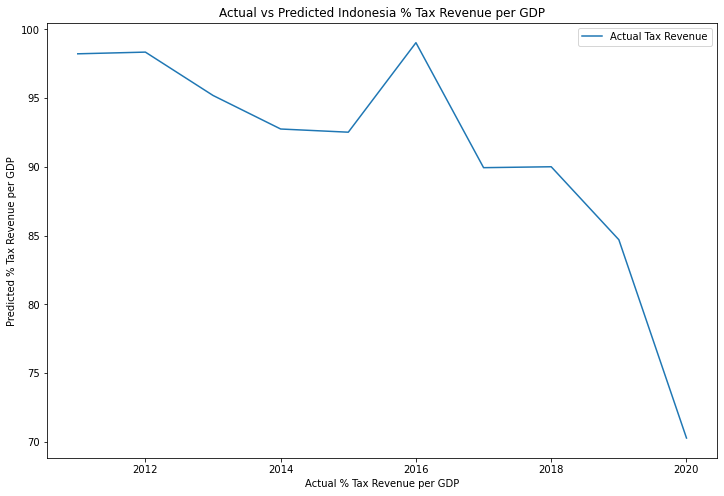

In [45]:
plt.figure(figsize=(12,8))
performance_index = [(1 - (x - y)/x)*100 for x, y in zip(indo_pred, indo_act)]
sns.lineplot(x=year_list, y=performance_index, label='Actual Tax Revenue')
plt.title("Actual vs Predicted Indonesia % Tax Revenue per GDP")
plt.xlabel("Actual % Tax Revenue per GDP")
plt.ylabel("Predicted % Tax Revenue per GDP")

#### Export Data and Machine Learning Model

In [52]:
merge_df.corr().columns

Index(['Year', '% Tax Revenue per GDP', 'CPI Score', 'GDP per Capita',
       'Inflation Rate', 'Population Growth', 'Unemployment Rate',
       'Labour Force Rate'],
      dtype='object')

for i in year_list:
    exec("filename = 'linearmodel_" + str(i) + ".sav'")
    exec("joblib.dump(model_" + str(i) + ", filename)")

In [47]:
### merge_df.to_csv('D:\Latihan Coding\TETRIS CEO BATCH 3\CAPSTONE PROJECT\Complete\Tax Analysis.csv', index=False, header=True)